Epoch 1/20


C:\Users\ridva\AppData\Local\Temp\ipykernel_97276\3619705758.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset = pd.read_csv('merged_dataset.csv', parse_dates=['Date'], index_col='Date')


15/15 - 1s - loss: 0.0152 - 1s/epoch - 80ms/step
Epoch 2/20
15/15 - 0s - loss: 0.0067 - 23ms/epoch - 2ms/step
Epoch 3/20
15/15 - 0s - loss: 0.0061 - 24ms/epoch - 2ms/step
Epoch 4/20
15/15 - 0s - loss: 0.0055 - 23ms/epoch - 2ms/step
Epoch 5/20
15/15 - 0s - loss: 0.0052 - 22ms/epoch - 1ms/step
Epoch 6/20
15/15 - 0s - loss: 0.0050 - 23ms/epoch - 2ms/step
Epoch 7/20
15/15 - 0s - loss: 0.0048 - 23ms/epoch - 2ms/step
Epoch 8/20
15/15 - 0s - loss: 0.0047 - 24ms/epoch - 2ms/step
Epoch 9/20
15/15 - 0s - loss: 0.0046 - 23ms/epoch - 2ms/step
Epoch 10/20
15/15 - 0s - loss: 0.0045 - 23ms/epoch - 2ms/step
Epoch 11/20
15/15 - 0s - loss: 0.0045 - 25ms/epoch - 2ms/step
Epoch 12/20
15/15 - 0s - loss: 0.0044 - 24ms/epoch - 2ms/step
Epoch 13/20
15/15 - 0s - loss: 0.0044 - 24ms/epoch - 2ms/step
Epoch 14/20
15/15 - 0s - loss: 0.0044 - 24ms/epoch - 2ms/step
Epoch 15/20
15/15 - 0s - loss: 0.0044 - 24ms/epoch - 2ms/step
Epoch 16/20
15/15 - 0s - loss: 0.0044 - 24ms/epoch - 2ms/step
Epoch 17/20
15/15 - 0s - loss

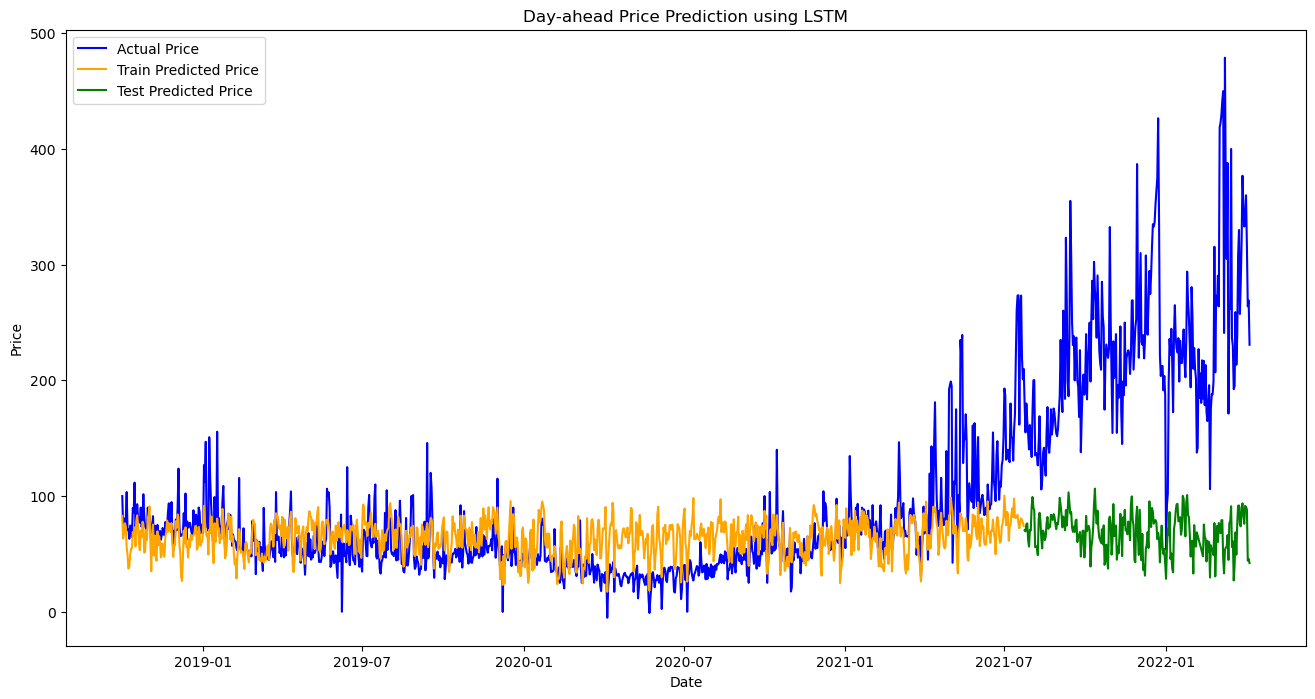

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


# Load the dataset
dataset = pd.read_csv('merged_dataset.csv', parse_dates=['Date'], index_col='Date')

# Separate features and target
features = dataset.drop(columns=['Day_ahead_Price'])
target = dataset['Day_ahead_Price']

# Scale the features and target data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

# Split the data into training and testing sets
train_size = int(len(scaled_features) * 0.80)
test_size = len(scaled_features) - train_size
train_features, test_features = scaled_features[0:train_size, :], scaled_features[train_size:len(scaled_features), :]
train_target, test_target = scaled_target[0:train_size, :], scaled_target[train_size:len(scaled_features), :]


# Reshape input to be [samples, time steps, features]
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(train_features, train_target, epochs=20, batch_size=70, verbose=2)

# Make predictions
train_predict = model.predict(train_features)
test_predict = model.predict(test_features)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
print('Train RMSE: ', np.sqrt(mean_squared_error(train_target, train_predict)))
print('Test RMSE: ', np.sqrt(mean_squared_error(test_target, test_predict)))

# Plot the actual vs predicted prices
plt.figure(figsize=(16,8))
plt.plot(dataset.index, scaler.inverse_transform(scaled_target.reshape(-1,1)), color='blue', label='Actual Price')
plt.plot(dataset.index[:train_size], train_predict, color='orange', label='Train Predicted Price')
plt.plot(dataset.index[train_size:], test_predict, color='green', label='Test Predicted Price')
plt.title('Day-ahead Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
